In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset
file_path = '/content/drive/My Drive/Grupo 5 Utec/Machine Learning/DataSet/data_TV.csv'  # Actualiza la ruta según sea necesario

# Leer el archivo CSV sin nombres de columna
df = pd.read_csv(file_path)

# Mostrar las primeras filas para verificar que se ha cargado correctamente
df.head()
df.info()

In [ ]:
# Chequear valores nulos en cada columna
nulos = df.isnull().sum()
print(nulos)

first_air_date        6
origin_country        0
original_language     0
name                  0
popularity            0
vote_average          0
vote_count            0
overview             65
dtype: int64


In [ ]:
df.describe()

# Mostrar los valores únicos para cada columna
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar resultados
unique_values

{'first_air_date': array(['2021-09-03', '2008-01-20', '2021-11-06', ..., '1997-03-31',
        '1985-02-19', '2006-10-09'], dtype=object),
 'origin_country': array(['US', 'JP', 'CA', 'KR', 'GB', 'AR', 'ES', 'CN', 'RU', 'MX', 'SE',
        'character(0)', 'TH', 'c("US", "GB")', 'CL', 'c("US", "GB", "NZ")',
        'c("US", "NG")', 'FR', 'DE', 'CO', 'IT', 'c("NC", "KR")', 'NO',
        'c("MX", "US")', 'c("GB", "US")', 'c("CA", "US")',
        'c("GB", "CA", "US")', 'c("CO", "US")', 'TR', 'c("JP", "US")',
        'PE', 'BR', 'AU', 'DK', 'IN', 'c("US", "CA", "FR", "BE")',
        'c("US", "AU")', 'c("US", "CA")',
        'c("DE", "GB", "IT", "PL", "RU", "GR")', 'ZA', 'c("CA", "FR")',
        'c("AR", "BR")', 'c("IT", "GB")', 'c("DK", "US")', 'c("US", "CO")',
        'IE', 'c("RU", "UA")', 'c("US", "GB", "FR", "ES", "IT")', 'VE',
        'PH', 'c("AR", "CO")', 'IL', 'PL', 'PR',
        'c("FR", "ES", "US", "GB", "IT")', 'c("US", "MX")', 'IS',
        'c("US", "FR")', 'JO', 'c("US", "JP", "

In [ ]:
# Convertir la columna 'first_air_date' a datetime para manejar posibles errores
df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')

# Filtrar las filas con valores nulos en 'first_air_date'
nulos_fecha = df[df['first_air_date'].isnull()]

# Imprimir las filas con valores nulos
print(nulos_fecha)

     first_air_date origin_country original_language  \
345             NaT             CO                es   
1222            NaT             CO                es   
1537            NaT   character(0)                en   
1553            NaT   character(0)                en   
1998            NaT             US                en   
2131            NaT             MX                es   

                                   name  popularity  vote_average  vote_count  \
345              Pandillas guerra y paz      10.470           8.4         152   
1222                        El Escamoso      27.859           7.8         330   
1537              En Los Tacones De Eva       4.997           7.6         130   
1553                 Para Volver a Amar       4.574           7.6         102   
1998  Mi Corazón Insiste en Lola Volcán       6.651           7.3         109   
2131                         La Mentira       5.017           7.2         173   

                                       

In [ ]:
# Convertir la columna 'first_air_date' a datetime para manejar posibles errores
df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')

# Diccionario con fechas encontradas manualmente
fechas_encontradas = {
    345: '1997-10-13',  # Reemplazar con la fecha correcta
    1222: '2001-08-24', # Reemplazar con la fecha correcta
    1537: '2006-11-06', # Reemplazar con la fecha correcta
    1553: '2010-07-12', # Reemplazar con la fecha correcta
    1998: '2011-05-23', # Reemplazar con la fecha correcta
    2131: '1998-07-13', # Reemplazar con la fecha correcta
}

# Actualizar el dataframe con las fechas encontradas
for index, fecha in fechas_encontradas.items():
    df.at[index, 'first_air_date'] = fecha

# Verificar si se completaron todas las fechas
print(df['first_air_date'].isnull().sum())

0


In [ ]:
# Asegurarse de que 'first_air_date' esté en formato datetime
df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')

# Crear nuevas columnas para el año y el mes
df['year'] = df['first_air_date'].dt.year
df['month'] = df['first_air_date'].dt.month

# Eliminar la columna original de fecha si ya no es necesaria
df = df.drop(columns=['first_air_date'])

# Verificar el resultado
print(df.head())

  origin_country original_language               name  popularity  \
0             US                en  The D'Amelio Show      30.104   
1             US                en       Breaking Bad     468.253   
2             US                en             Arcane      95.667   
3             US                en     Rick and Morty    1511.996   
4             US                en    The Kardashians     195.038   

   vote_average  vote_count  \
0           9.0        3071   
1           8.8       10131   
2           8.7        2615   
3           8.7        7220   
4           8.7        1627   

                                            overview  year  month  
0  From relative obscurity and a seemingly normal...  2021      9  
1  When Walter White, a New Mexico chemistry teac...  2008      1  
2  Amid the stark discord of twin cities Piltover...  2021     11  
3  Rick is a mentally-unbalanced but scientifical...  2013     12  
4  The family you know and love is here with a br...  2022

In [ ]:
df = df.drop(columns=['overview'])

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   origin_country     2617 non-null   object 
 1   original_language  2617 non-null   object 
 2   name               2617 non-null   object 
 3   popularity         2617 non-null   float64
 4   vote_average       2617 non-null   float64
 5   vote_count         2617 non-null   int64  
 6   year               2617 non-null   int32  
 7   month              2617 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 143.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inicializar LabelEncoder
le_country = LabelEncoder()
le_language = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas
df['origin_country_encoded'] = le_country.fit_transform(df['origin_country'])
df['original_language_encoded'] = le_language.fit_transform(df['original_language'])

# Eliminar las columnas originales si ya no son necesarias
df = df.drop(columns=['origin_country', 'original_language'])

print(df.head())

                name  popularity  vote_average  vote_count  year  month  \
0  The D'Amelio Show      30.104           9.0        3071  2021      9   
1       Breaking Bad     468.253           8.8       10131  2008      1   
2             Arcane      95.667           8.7        2615  2021     11   
3     Rick and Morty    1511.996           8.7        7220  2013     12   
4    The Kardashians     195.038           8.7        1627  2022      4   

   origin_country_encoded  original_language_encoded  
0                      34                          4  
1                      34                          4  
2                      34                          4  
3                      34                          4  
4                      34                          4  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas a normalizar
numerical_cols = ['popularity', 'vote_average', 'vote_count', 'month', 'year', 'origin_country_encoded', 'original_language_encoded']

# Crear el scaler y ajustar los datos
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Guardar la columna 'name' para posterior uso
names = df['name']

# Eliminar la columna 'name' para el clustering
df = df.drop(columns=['name'])

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   popularity                 2617 non-null   float64
 1   vote_average               2617 non-null   float64
 2   vote_count                 2617 non-null   float64
 3   year                       2617 non-null   float64
 4   month                      2617 non-null   float64
 5   origin_country_encoded     2617 non-null   float64
 6   original_language_encoded  2617 non-null   float64
dtypes: float64(7)
memory usage: 143.2 KB


In [ ]:
# Asegurarse de que los tipos de datos sean correctos
df = df.astype(float)  # Convertir todos los datos a float para asegurar la compatibilidad con k-means

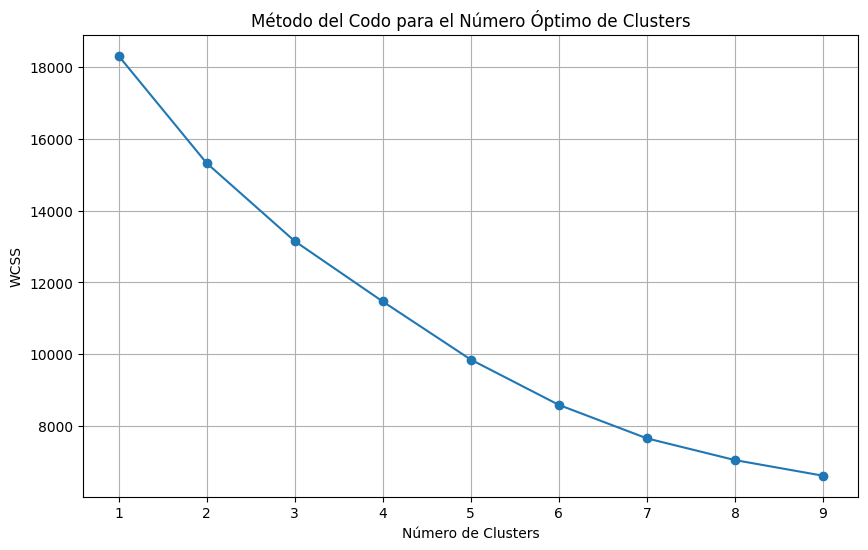

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método del codo
wcss = []  # Within-cluster sum of squares

for i in range(1, 10):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Método del Codo para el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

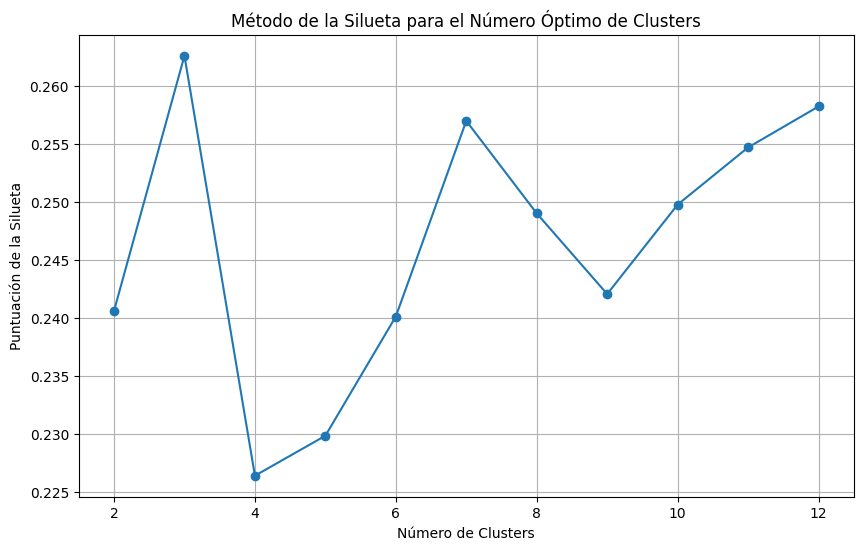

In [ ]:
# Método de la silueta
silhouette_scores = []

for i in range(2, 13):  # De 2 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, clusters)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.title('Método de la Silueta para el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.grid(True)
plt.show()

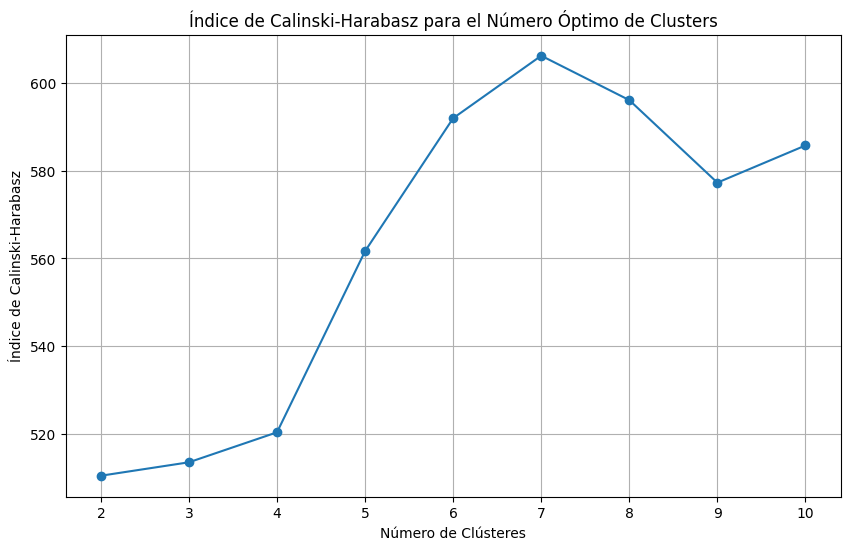

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Rango de números de clústeres a probar
cluster_range = range(2, 11)

# Inicializar lista para los índices de Calinski-Harabasz
calinski_harabasz_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(df)

    calinski_harabasz_avg = calinski_harabasz_score(df, clusters)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Graficar los índices de Calinski-Harabasz
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.title('Índice de Calinski-Harabasz para el Número Óptimo de Clusters')
plt.xlabel('Número de Clústeres')
plt.ylabel('Índice de Calinski-Harabasz')
plt.grid(True)
plt.show()

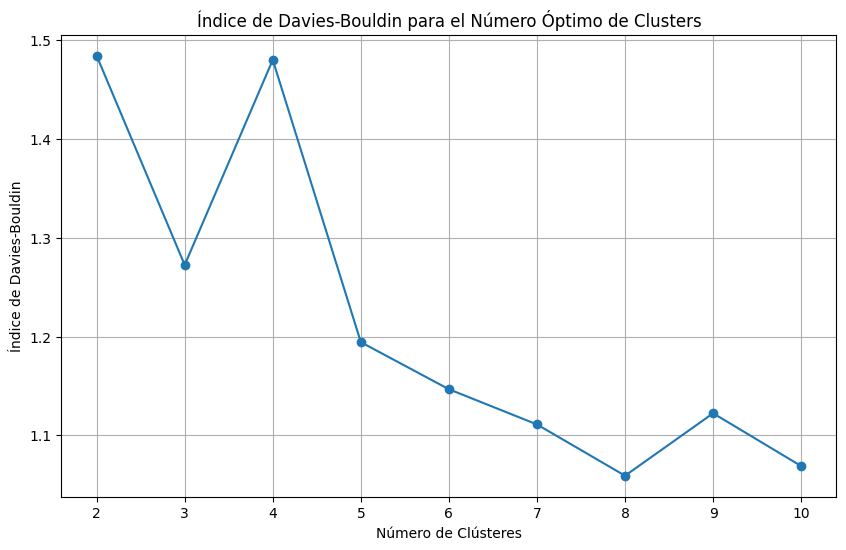

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Rango de números de clústeres a probar
cluster_range = range(2, 11)

# Inicializar lista para los índices de Davies-Bouldin
davies_bouldin_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(df)

    davies_bouldin_avg = davies_bouldin_score(df, clusters)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Graficar los índices de Davies-Bouldin
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title('Índice de Davies-Bouldin para el Número Óptimo de Clusters')
plt.xlabel('Número de Clústeres')
plt.ylabel('Índice de Davies-Bouldin')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


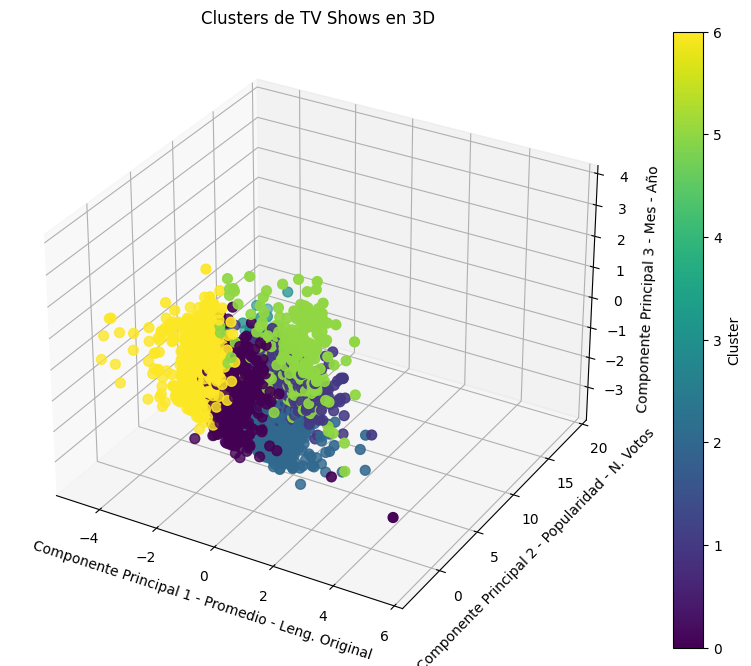

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Asumiendo que df_scaled es el DataFrame con los datos escalados

df_copy = df.copy()

# Aplicar PCA para reducir la dimensionalidad a 3D
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_copy)  # Usar df_scaled aquí para reducir la dimensionalidad

# Ejecutar k-means para un número específico de clústeres, por ejemplo, 7
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_copy)  # Usar df_scaled aquí también para el clustering

# Añadir los clústeres al DataFrame original
df_copy['cluster'] = clusters

# Obtener los centros de los clústeres y transformarlos a la misma dimensión que df_pca
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)  # Transformar los centros a 3D para visualización

# Graficar los resultados en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de los clústeres
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis', marker='o', s=50)

# Graficar los centros de los clústeres
ax.scatter(centers_pca[:, 0], centers_pca[:, 1], centers_pca[:, 2], c='red', s=200, alpha=0.75, marker='x')

# Etiquetas para los ejes
ax.set_xlabel('Componente Principal 1 - Promedio - Leng. Original')
ax.set_ylabel('Componente Principal 2 - Popularidad - N. Votos')
ax.set_zlabel('Componente Principal 3 - Mes - Año')

# Título y barra de color
plt.title('Clusters de TV Shows en 3D')
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


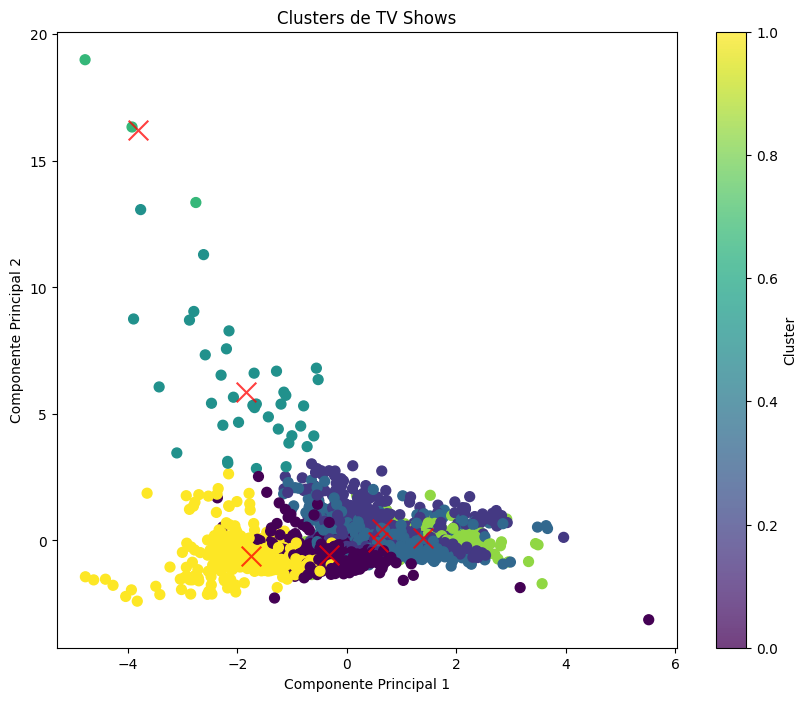

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Asumiendo que df_scaled es el DataFrame con los datos escalados

df_copy = df.copy()

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_copy)  # Usar df_scaled aquí para reducir la dimensionalidad

# Ejecutar k-means para un número específico de clústeres, por ejemplo, 7
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_copy)  # Usar df_scaled aquí también para el clustering

# Añadir los clústeres al DataFrame original
df_copy['cluster'] = clusters

# Obtener los centros de los clústeres y transformarlos a la misma dimensión que df_pca
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)  # Transformar los centros a 2D para visualización

# Graficar los resultados (solo los primeros dos componentes para la visualización)
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de TV Shows')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Puntuación de Silueta
silhouette_avg = silhouette_score(df_copy, clusters)
print(f"Puntuación de Silueta: {silhouette_avg:.4f}")

# Índice de Calinski-Harabasz
calinski_harabasz_index = calinski_harabasz_score(df_copy, clusters)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_index:.4f}")

# Índice de Davies-Bouldin
davies_bouldin_index = davies_bouldin_score(df_copy, clusters)
print(f"Índice de Davies-Bouldin: {davies_bouldin_index:.4f}")

Puntuación de Silueta: 0.3701
Índice de Calinski-Harabasz: 1339.3004
Índice de Davies-Bouldin: 0.9252
